<a href="https://colab.research.google.com/github/filipecarbonera/bootcamp_data_science/blob/main/Modulo01/M%C3%B3dulo_01_Super_Desafio_Filipe_Carbonera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Super Desafio do Módulo 01:** Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

**Para o desafio deste módulo escolhi os seguintes dados:**

Número de internações processadas no Rio Grande do Sul, divididos por Região, de janeiro de 2009 a dezembro de 2019.

In [ ]:
# Buscando os dados.

import pandas as pd

URL = 'https://raw.githubusercontent.com/filipecarbonera/bootcamp_data_science_modulo_01/main/Dados/rs_internacoes.csv'

dados_desafio = pd.read_csv(URL, sep=';', encoding='ISO-8859-1', thousands='.', decimal=',')
dados_desafio

,Macrorregiao de Saude,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
0,4308 VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
1,4309 SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
2,4310 SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
3,4311 NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
4,4312 MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
5,4313 METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,...,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779,3632877
6,4314 CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
7,1234 Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,58449,58829,59804,55489,55064,56781,62421,...,65122,61982,

In [ ]:
# Retirar os números no início dos nomes das regiões.

dados_desafio['Macrorregiao de Saude'] = dados_desafio['Macrorregiao de Saude'].str[5:]
dados_desafio

,Macrorregiao de Saude,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
0,VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
1,SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
2,SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
3,NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
4,MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
5,METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,...,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779,3632877
6,CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
7,Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,58449,58829,59804,55489,55064,56781,62421,...,65122,61982,62084,59465,54957,61218,60358,65904,6477

In [ ]:
# Definir a coluna de regiões como índice.

dados_desafio = dados_desafio.set_index('Macrorregiao de Saude')
dados_desafio

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779,3632877
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,

In [ ]:
#Verificando os tipos de dados presentes no dataset.

dados_desafio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, VALES to Total
Columns: 133 entries, 2009/Jan to Total
dtypes: int64(133)
memory usage: 8.4+ KB


In [ ]:
# Tratando os dados:

# Antes de tudo vou verificar a existência de dados faltantes no dataset.

dados_desafio.isnull().sum().sum()

0

In [ ]:
# Apresentando os dados tratados.

dados_desafio

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779,3632877
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,

In [ ]:
# Criando um dataset geral sem total para futuros plots.
dados_desafio_sem_total = dados_desafio.drop('Total', axis=1)
dados_desafio_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,28172,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,

In [ ]:
# Continuando.
dados_desafio_sem_total = dados_desafio_sem_total.T.drop(columns='Total')
dados_desafio_sem_total = dados_desafio_sem_total.T
dados_desafio_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,28172,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220


In [ ]:
# Iniciando um overview, vamos buscar algumas médias para verificar os dados superficialmente:

# Média por mês.
dados_desafio.mean()

2009/Jan      13576.50
2009/Fev      13960.25
2009/Mar      15670.25
2009/Abr      15578.50
2009/Mai      15402.25
               ...    
2019/Set      16449.50
2019/Out      17133.50
2019/Nov      15669.50
2019/Dez      15322.00
Total       2039649.50
Length: 133, dtype: float64

In [ ]:
# Média por Macroregião.
dados_desafio.T.mean()

Macrorregiao de Saude
VALES             10297.157895
SUL               10813.684211
SERRA             10181.263158
NORTE             16436.315789
MISSIONEIRA       10360.796992
METROPOLITANA     54629.729323
CENTRO-OESTE       9966.736842
Total            122685.684211
dtype: float64

In [ ]:
# Observo que a região metropolitana pode estar mascarando a média dos meses, pois seus valores são relavantemente altos em relação as demais regiões.

In [ ]:
# Criando então um dataset separado para a região metropolitana e outro para os demais.

# Demais regiões.
dados_demais_regioes = dados_desafio.drop('METROPOLITANA')
dados_demais_regioes

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,58449,58829,59804,55489,55064,56781,62421,57696,...,65122,61982,62084,59465,54957,61218,60358,65904,64774,67203,65685,64721,63043,62900,60383,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,8158598


In [ ]:
#Região metropolitana:
dados_metropolitana = dados_desafio.loc['METROPOLITANA']
dados_metropolitana

2009/Jan      23945
2009/Fev      24826
2009/Mar      28153
2009/Abr      27956
2009/Mai      27134
             ...   
2019/Set      29048
2019/Out      30798
2019/Nov      27576
2019/Dez      26779
Total       3632877
Name: METROPOLITANA, Length: 133, dtype: int64

In [ ]:
# Buscando a média das demais regiões.
dados_demais_regioes.T.mean()

Macrorregiao de Saude
VALES            10297.157895
SUL              10813.684211
SERRA            10181.263158
NORTE            16436.315789
MISSIONEIRA      10360.796992
CENTRO-OESTE      9966.736842
Total           122685.684211
dtype: float64

In [ ]:
# Média da região metropolitana.
dados_metropolitana.mean()

54629.72932330827

In [ ]:
# Antes de verificar as médias em gráficos preciso tirar o total dessas bases também:
dados_demais_regioes_sem_total = dados_demais_regioes.drop('Total', axis=1)
dados_demais_regioes_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,58449,58829,59804,55489,55064,56781,62421,57696,...,61559,65122,61982,62084,59465,54957,61218,60358,65904,64774,67203,65685,64721,63043,62900,60383,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288


In [ ]:
# Continuando.
dados_demais_regioes_sem_total = dados_demais_regioes_sem_total.T.drop('Total', axis=1)
dados_demais_regioes_sem_total = dados_demais_regioes_sem_total.T
dados_demais_regioes_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220


In [ ]:
# E o mesmo com a região metropolitana:
dados_metropolitana_sem_total = dados_metropolitana.drop('Total')
dados_metropolitana_sem_total

2009/Jan    23945
2009/Fev    24826
2009/Mar    28153
2009/Abr    27956
2009/Mai    27134
            ...  
2019/Ago    30269
2019/Set    29048
2019/Out    30798
2019/Nov    27576
2019/Dez    26779
Name: METROPOLITANA, Length: 132, dtype: int64

In [ ]:
# Agora vou comparar a média geral com a média sem a região metropolitana para verificar a diferença.

dados_desafio.mean()

2009/Jan      13576.50
2009/Fev      13960.25
2009/Mar      15670.25
2009/Abr      15578.50
2009/Mai      15402.25
               ...    
2019/Set      16449.50
2019/Out      17133.50
2019/Nov      15669.50
2019/Dez      15322.00
Total       2039649.50
Length: 133, dtype: float64

In [ ]:
dados_demais_regioes.mean()

2009/Jan    1.209529e+04
2009/Fev    1.240800e+04
2009/Mar    1.388700e+04
2009/Abr    1.381029e+04
2009/Mai    1.372629e+04
                ...     
2019/Set    1.464971e+04
2019/Out    1.518143e+04
2019/Nov    1.396857e+04
2019/Dez    1.368529e+04
Total       1.812046e+06
Length: 133, dtype: float64

**Recaptulando os datasets que temos até aqui:**

In [ ]:
# Todos os dados:
dados_desafio

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779,3632877
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,

In [ ]:
# Todos os dados sem os totais:
dados_desafio_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732,25788,25839,26929,29010,28517,27906,28696,28395,26162,26658,26603,25726,23001,22150,24346,24487,27412,31439,28118,26575,25937,26100,27381,24469,22283,25660,25656,23826,...,28172,27473,26968,26808,25729,25724,28382,27001,29237,28193,30221,29189,28771,28314,27633,26360,25919,23683,26916,26871,27066,26841,27931,28212,27731,27880,26062,25998,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220


In [ ]:
# Dados das regiões em exceção da Metropolitana:
dados_demais_regioes

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999,684761
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011,719110
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037,677054
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866,1093015
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376,688993
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220,662788
Total,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,55659,59587,64211,62466,58232,58449,58829,59804,55489,55064,56781,62421,57696,...,65122,61982,62084,59465,54957,61218,60358,65904,64774,67203,65685,64721,63043,62900,60383,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,8158598


In [ ]:
# Dados das regiões em exceção da Metropolitana sem totais:
dados_demais_regioes_sem_total

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806,4716,4211,5198,4694,4768,4723,4680,4999,4745,4806,4639,4699,4848,4232,4938,4325,5088,4694,5302,4507,4583,4903,4418,4515,4813,4615,4992,5011,...,5332,5631,5547,5641,5072,4861,5453,5199,5568,5690,6027,5491,5338,5187,5431,5486,5139,4996,5575,5596,5463,5358,5795,5356,5388,5437,5427,5095,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226,5584,5297,5652,5399,5911,5666,6037,5523,5529,5518,5590,5527,5541,4855,6140,5708,5689,5444,6059,5570,5563,5298,5384,5025,5966,4762,5235,6051,...,5576,5710,5297,5084,4790,4499,5166,4924,5395,5182,5433,5491,5221,5137,4969,4972,5089,4783,5098,5354,5218,4666,5118,5495,5120,5051,4777,4689,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027,4863,5052,5085,4893,5688,5213,5200,5515,5268,5184,5158,5274,4730,4571,5024,4665,5035,5111,5169,5101,4973,5250,4975,4841,4394,4693,4692,5034,...,4974,5128,4883,4902,4200,4947,5015,5050,5541,5208,5414,5417,5249,5228,5298,4953,4990,4889,5371,5321,5332,5044,5386,5520,5249,5111,4862,4949,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705,7897,7060,7276,7076,7603,6566,7876,7732,7660,7663,7606,8398,7695,7283,8012,6607,6784,7494,7104,6646,7329,7354,7404,6656,7014,7111,10941,7706,...,7351,10255,8827,9306,10178,6909,7688,8300,10398,8955,9190,9280,9673,9063,9480,8404,9377,8648,9041,8962,9124,9422,9418,9567,9049,9276,8702,9100,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761,5161,4777,5192,5006,5221,4854,5027,5060,5204,5234,5227,5480,4790,4630,5362,4924,4647,4931,5301,4847,4997,5192,5036,5302,4905,5103,5465,5098,...,5039,5649,5234,5189,4965,4505,4886,5015,5192,5541,5175,5075,5559,5250,5390,5483,5042,4981,5358,5297,5606,5403,5385,5470,5368,5497,5531,5299,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511,4608,4492,4651,4825,5622,4674,5382,5395,5447,5045,5349,5411,4573,5163,5207,4943,4932,5098,5413,4986,5067,4732,5206,4681,5689,4837,5440,4970,...,5115,5276,5226,5154,4531,3512,4628,4869,4573,6005,5743,5742,4910,4864,4699,4725,4607,4494,4636,5132,4689,5303,5020,4905,5675,4463,5880,4443,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220


In [ ]:
# Dados da região Metropolitana:
dados_metropolitana

2009/Jan      23945
2009/Fev      24826
2009/Mar      28153
2009/Abr      27956
2009/Mai      27134
             ...   
2019/Set      29048
2019/Out      30798
2019/Nov      27576
2019/Dez      26779
Total       3632877
Name: METROPOLITANA, Length: 133, dtype: int64

In [ ]:
# Dados da região Metropolitana sem totais:
dados_metropolitana_sem_total

2009/Jan    23945
2009/Fev    24826
2009/Mar    28153
2009/Abr    27956
2009/Mai    27134
            ...  
2019/Ago    30269
2019/Set    29048
2019/Out    30798
2019/Nov    27576
2019/Dez    26779
Name: METROPOLITANA, Length: 132, dtype: int64

**Seguindo:**

In [ ]:
# Vou iniciar alguns plots:

import matplotlib.pyplot as plt

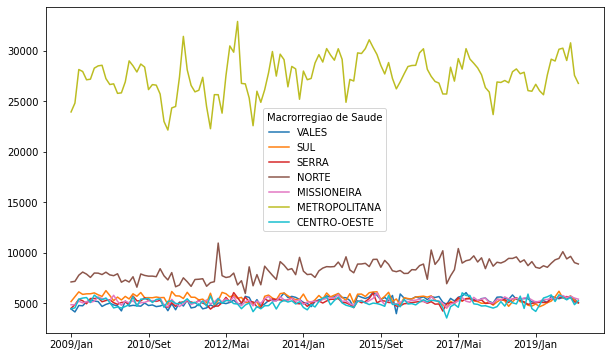

In [ ]:
dados_desafio_sem_total.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.show()

# Evidencia-se com esse gráfico a diferença da região metropolitana para as demais regiões em termos de números de internações.

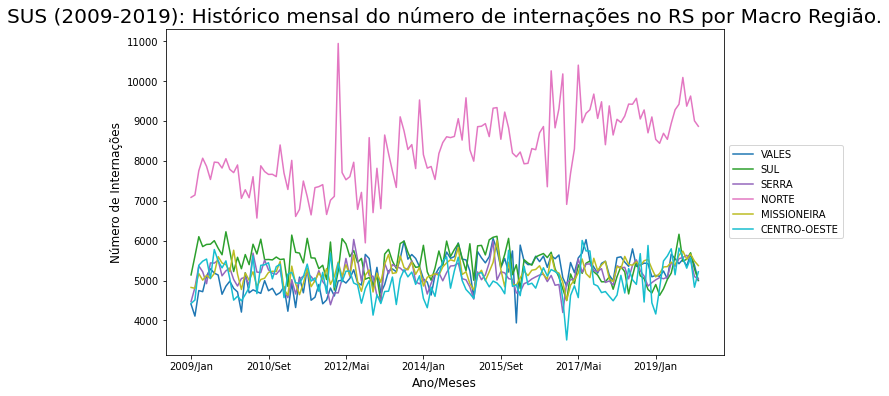

In [ ]:
dados_demais_regioes_sem_total.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS (2009-2019): Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Em um gráfico sem a região metropolitana  podemos ver que além da região metropolitana, a região norte tem muito mais internações do que as demais regiões.

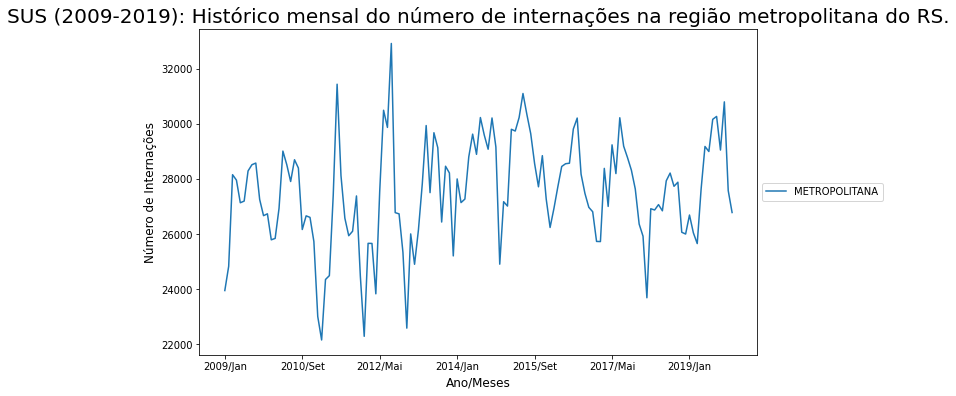

In [ ]:
dados_metropolitana_sem_total.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS (2009-2019): Histórico mensal do número de internações na região metropolitana do RS.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Com este gráfico não consigo tirar muitas conclusões...

In [ ]:
# Vou comparar o histórico de alguns anos para cada região para ver se surge alguma informação interessante.

# Pegar os dados de 2019 para todas as regiões:

dados_desafio_2019 = dados_desafio_sem_total[['2019/Jan','2019/Fev','2019/Mar','2019/Abr','2019/Mai','2019/Jun','2019/Jul','2019/Ago','2019/Set','2019/Out','2019/Nov','2019/Dez']]
dados_desafio_2019

,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
Macrorregiao de Saude,,,,,,,,,,,,
VALES,5130,5107,5240,5044,5662,5547,5422,5530,5363,5661,5384,4999
SUL,4902,4631,4793,5029,5188,5616,6161,5485,5534,5697,5292,5011
SERRA,5019,5076,5046,5086,5447,5359,5548,5579,5633,5524,5101,5037
NORTE,8538,8439,8690,8539,8939,9280,9418,10089,9370,9624,9003,8866
MISSIONEIRA,5093,5177,5342,5350,5462,5391,5638,5738,5539,5662,5488,5376
METROPOLITANA,26688,26041,25651,27626,29178,28995,30164,30269,29048,30798,27576,26779
CENTRO-OESTE,4163,4812,5491,5617,5797,5146,5814,5573,5311,5568,4834,5220


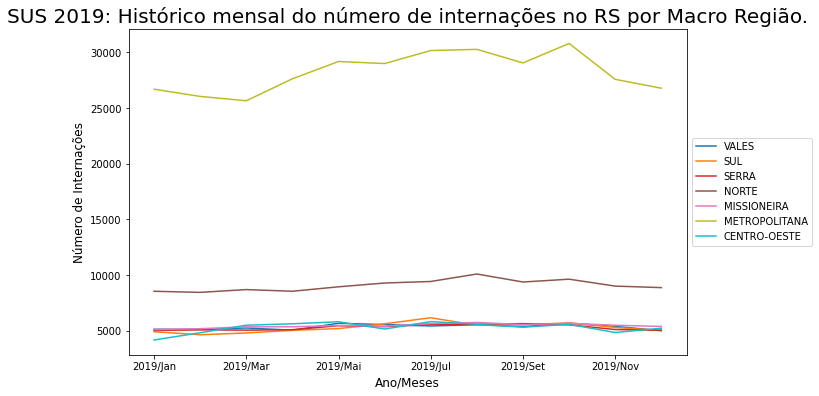

In [ ]:
dados_desafio_2019.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2019: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
# E vou comparar com 10 anos antes para verificar se houve alterações significativas no comportamento mensal do gráfico.

dados_desafio_2009 = dados_desafio_sem_total[['2009/Jan','2009/Fev','2009/Mar','2009/Abr','2009/Mai','2009/Jun','2009/Jul','2009/Ago','2009/Set','2009/Out','2009/Nov','2009/Dez']]
dados_desafio_2009

,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez
Macrorregiao de Saude,,,,,,,,,,,,
VALES,4408,4110,4750,4722,5114,5295,5186,5140,4657,4859,4984,4806
SUL,5142,5614,6100,5852,5906,5912,6000,5811,5647,6223,5742,5226
SERRA,4472,4827,5367,5221,4923,5443,5438,5509,5120,5245,5314,5027
NORTE,7085,7144,7754,8066,7861,7533,7968,7958,7819,8054,7787,7705
MISSIONEIRA,4828,4807,5174,5011,5131,5052,5178,5600,5441,5400,5229,5761
METROPOLITANA,23945,24826,28153,27956,27134,27194,28288,28515,28575,27254,26665,26732
CENTRO-OESTE,4426,4513,5383,5486,5540,5052,5778,5489,5318,5494,5051,4511


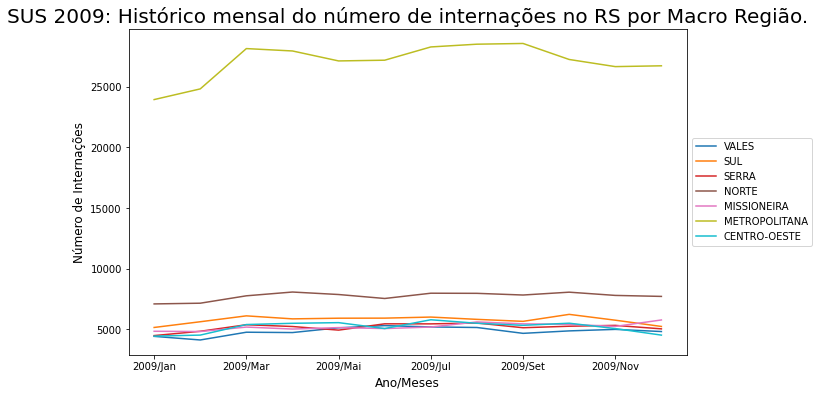

In [ ]:
dados_desafio_2009.T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2009: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
# Nessa visualização, de 10 anos de diferença, parece ser bastante estável o número de internações durante o ano.

In [ ]:
# A proveitando a digitação que fiz sobre os anos de 2009 e 2019, vou guarda-los em duas liastas:

In [ ]:
lista_2019 = ['2019/Jan','2019/Fev','2019/Mar','2019/Abr','2019/Mai','2019/Jun','2019/Jul','2019/Ago','2019/Set','2019/Out','2019/Nov','2019/Dez']
lista_2019

['2019/Jan',
 '2019/Fev',
 '2019/Mar',
 '2019/Abr',
 '2019/Mai',
 '2019/Jun',
 '2019/Jul',
 '2019/Ago',
 '2019/Set',
 '2019/Out',
 '2019/Nov',
 '2019/Dez']

In [ ]:
lista_2009 = ['2009/Jan','2009/Fev','2009/Mar','2009/Abr','2009/Mai','2009/Jun','2009/Jul','2009/Ago','2009/Set','2009/Out','2009/Nov','2009/Dez']
lista_2009

['2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez']

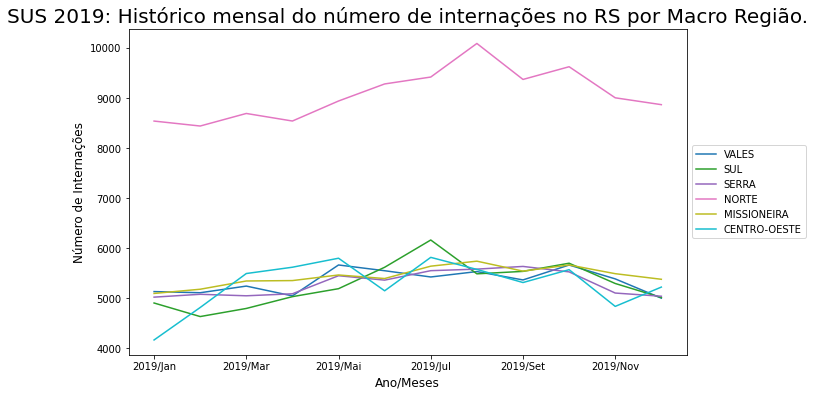

In [ ]:
# Com isso é possível verificar os mesmos gráficos anteriores sem a região metropolitana:

dados_demais_regioes_sem_total[lista_2019].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2019: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

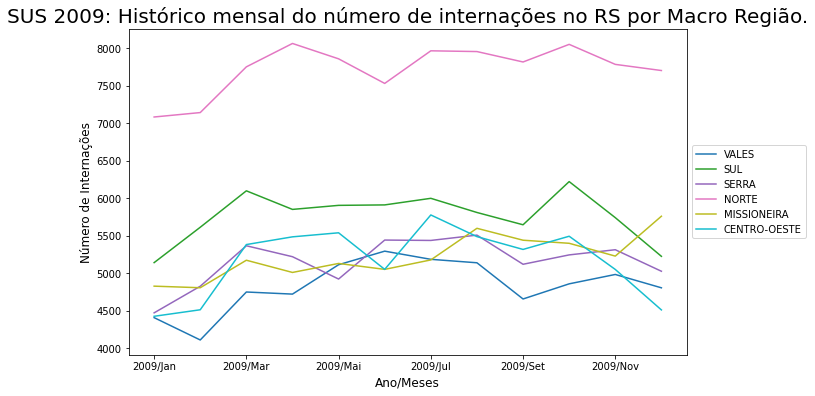

In [ ]:
dados_demais_regioes_sem_total[lista_2009].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2009: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
 # Crio aqui um método para dispor dos demais anos que desejar.
 
 lista_2010 = []
 soma = 0
 for ano in lista_2009:
    lista_2010.append('2010'+(ano[4:]))
    print('2010'+(ano[4:]))
    soma += 1

2010/Jan
2010/Fev
2010/Mar
2010/Abr
2010/Mai
2010/Jun
2010/Jul
2010/Ago
2010/Set
2010/Out
2010/Nov
2010/Dez


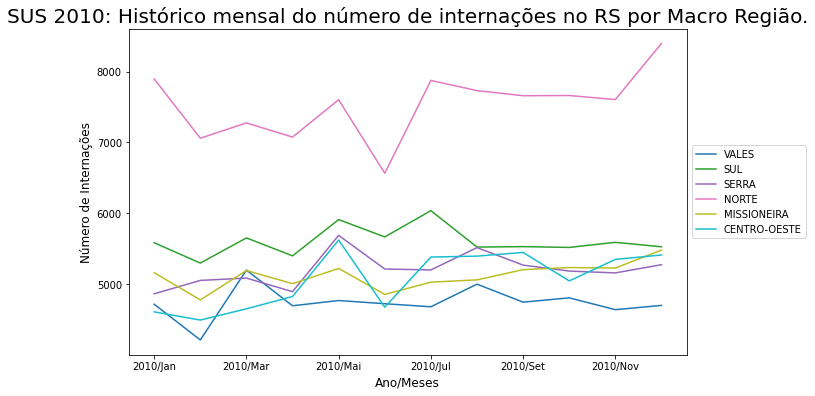

In [ ]:
# Visualizando o gráfico de 2010, confirma-se ainda mais a "estabilidade" anual das internações.
dados_demais_regioes_sem_total[lista_2010].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2010: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

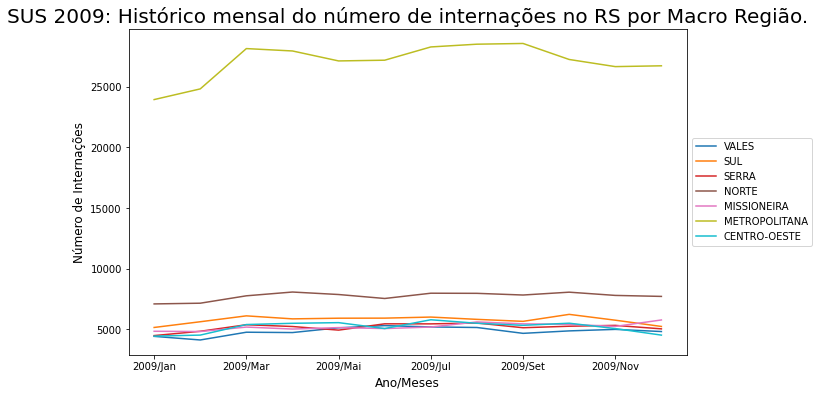

In [ ]:
dados_desafio_sem_total[lista_2009].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2009: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

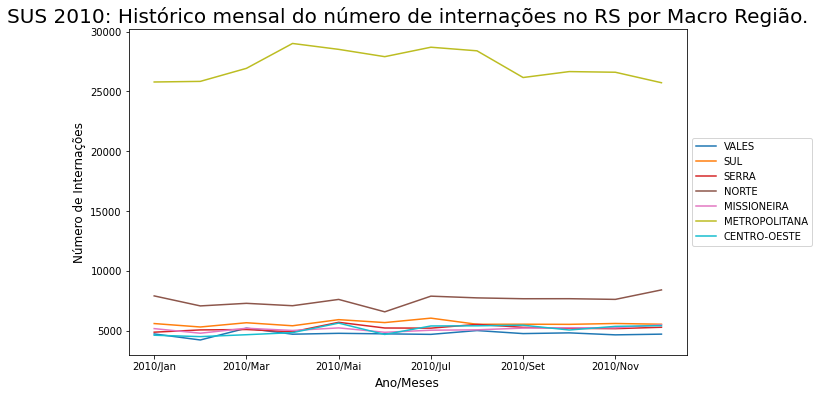

In [ ]:
# Visualizando 2010 com a região metropolitana.

dados_desafio_sem_total[lista_2010].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2010: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
# Na seguencia, decido criar a lista com todos os anos do range que decidi estudar, para tentar tirar conclusões mais detalhadas.

In [ ]:
 lista_2011 = []
 soma = 0
 for ano in lista_2009:
    lista_2011.append('2011'+(ano[4:]))
    print('2011'+(ano[4:]))
    soma += 1

2011/Jan
2011/Fev
2011/Mar
2011/Abr
2011/Mai
2011/Jun
2011/Jul
2011/Ago
2011/Set
2011/Out
2011/Nov
2011/Dez


In [ ]:
 lista_2012 = []
 soma = 0
 for ano in lista_2009:
    lista_2012.append('2012'+(ano[4:]))
    print('2012'+(ano[4:]))
    soma += 1

2012/Jan
2012/Fev
2012/Mar
2012/Abr
2012/Mai
2012/Jun
2012/Jul
2012/Ago
2012/Set
2012/Out
2012/Nov
2012/Dez


In [ ]:
 lista_2013 = []
 soma = 0
 for ano in lista_2009:
    lista_2013.append('2013'+(ano[4:]))
    print('2013'+(ano[4:]))
    soma += 1

2013/Jan
2013/Fev
2013/Mar
2013/Abr
2013/Mai
2013/Jun
2013/Jul
2013/Ago
2013/Set
2013/Out
2013/Nov
2013/Dez


In [ ]:
 lista_2014 = []
 soma = 0
 for ano in lista_2009:
    lista_2014.append('2014'+(ano[4:]))
    print('2014'+(ano[4:]))
    soma += 1

2014/Jan
2014/Fev
2014/Mar
2014/Abr
2014/Mai
2014/Jun
2014/Jul
2014/Ago
2014/Set
2014/Out
2014/Nov
2014/Dez


In [ ]:
 lista_2015 = []
 soma = 0
 for ano in lista_2009:
    lista_2015.append('2015'+(ano[4:]))
    print('2015'+(ano[4:]))
    soma += 1

2015/Jan
2015/Fev
2015/Mar
2015/Abr
2015/Mai
2015/Jun
2015/Jul
2015/Ago
2015/Set
2015/Out
2015/Nov
2015/Dez


In [ ]:
 lista_2016 = []
 soma = 0
 for ano in lista_2009:
    lista_2016.append('2016'+(ano[4:]))
    print('2016'+(ano[4:]))
    soma += 1

2016/Jan
2016/Fev
2016/Mar
2016/Abr
2016/Mai
2016/Jun
2016/Jul
2016/Ago
2016/Set
2016/Out
2016/Nov
2016/Dez


In [ ]:
 lista_2017 = []
 soma = 0
 for ano in lista_2009:
    lista_2017.append('2017'+(ano[4:]))
    print('2017'+(ano[4:]))
    soma += 1

2017/Jan
2017/Fev
2017/Mar
2017/Abr
2017/Mai
2017/Jun
2017/Jul
2017/Ago
2017/Set
2017/Out
2017/Nov
2017/Dez


In [ ]:
 lista_2018 = []
 soma = 0
 for ano in lista_2009:
    lista_2018.append('2018'+(ano[4:]))
    print('2018'+(ano[4:]))
    soma += 1

2018/Jan
2018/Fev
2018/Mar
2018/Abr
2018/Mai
2018/Jun
2018/Jul
2018/Ago
2018/Set
2018/Out
2018/Nov
2018/Dez


In [ ]:
 lista_2019 = []
 soma = 0
 for ano in lista_2009:
    lista_2019.append('2019'+(ano[4:]))
    print('2019'+(ano[4:]))
    soma += 1

2019/Jan
2019/Fev
2019/Mar
2019/Abr
2019/Mai
2019/Jun
2019/Jul
2019/Ago
2019/Set
2019/Out
2019/Nov
2019/Dez


In [ ]:
# Plotando os gráficos anuais para verificar a sazonalidade e algum possível outlier.

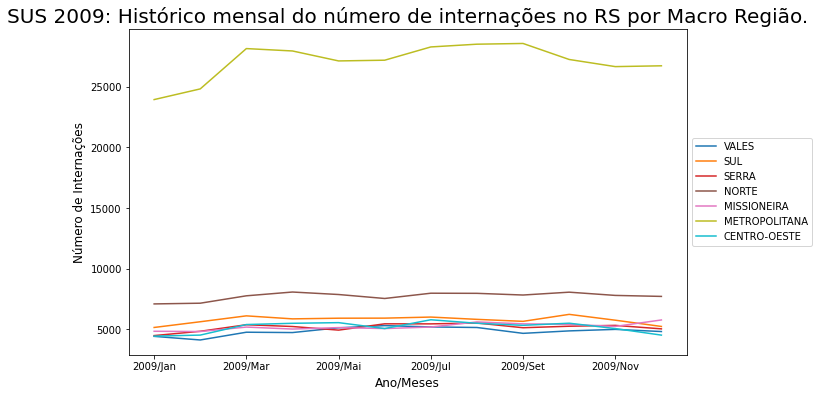

In [ ]:
dados_desafio_sem_total[lista_2009].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2009: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

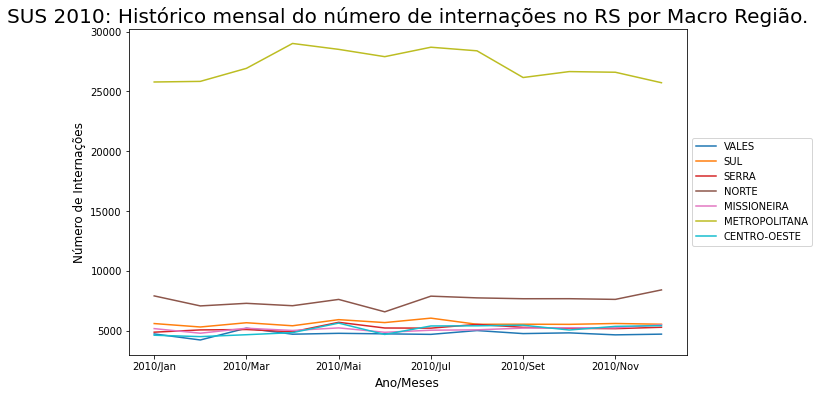

In [ ]:
dados_desafio_sem_total[lista_2010].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2010: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

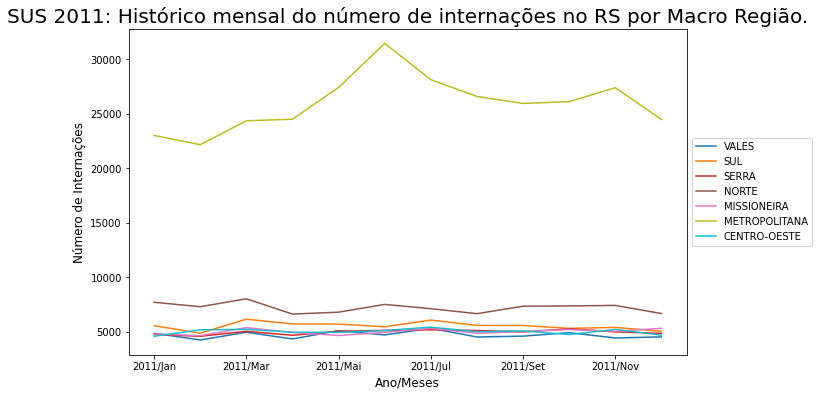

In [ ]:
dados_desafio_sem_total[lista_2011].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2011: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# O que aconteceu em junho de 2011 na região metropolitana?

**Fonte de noticias utilizado:** https://saude.rs.gov.br/noticias

O que se tem de informação sobre o ano de 2011 no RS são principalmente notícias sobre o início do surto de H1N1, com os primeiros casos da doença em meados de maio daquele ano.

Pode ter intensificado a chegada do inverno no período próximo a junho.

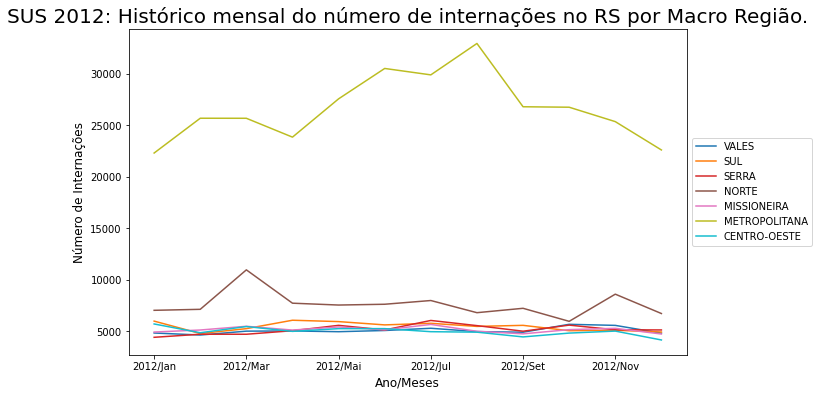

In [ ]:
dados_desafio_sem_total[lista_2012].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2012: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# O que aconteceu em agosto de 2012 na região metropolitana?
# E em março e novembro de 2012 na região norte?

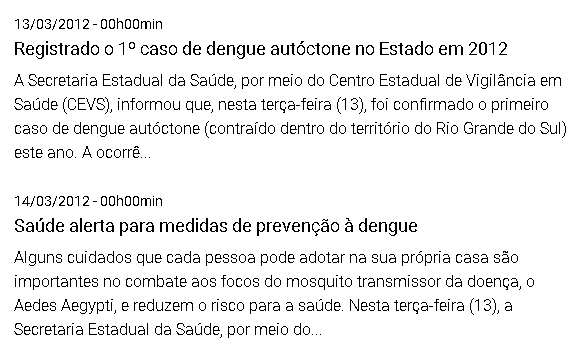

---

Em 2012 há diversas notícias como essas, principalmente vinculadas à dengue.

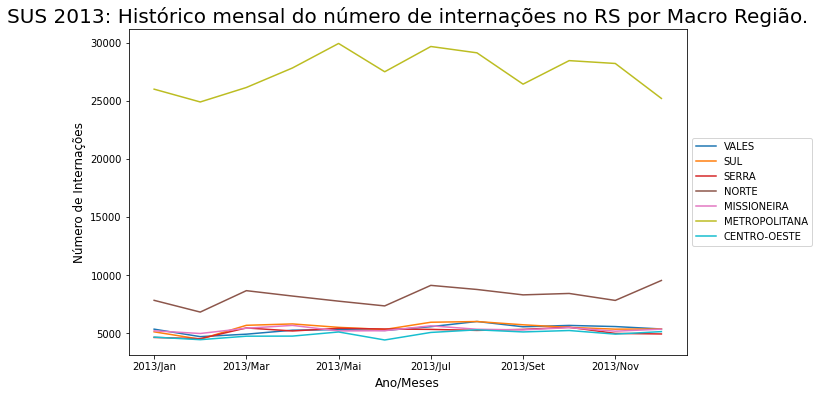

In [ ]:
dados_desafio_sem_total[lista_2013].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2013: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

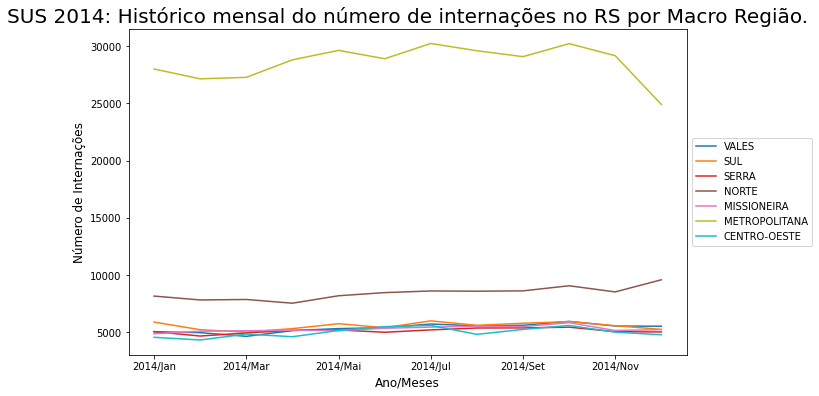

In [ ]:
dados_desafio_sem_total[lista_2014].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2014: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

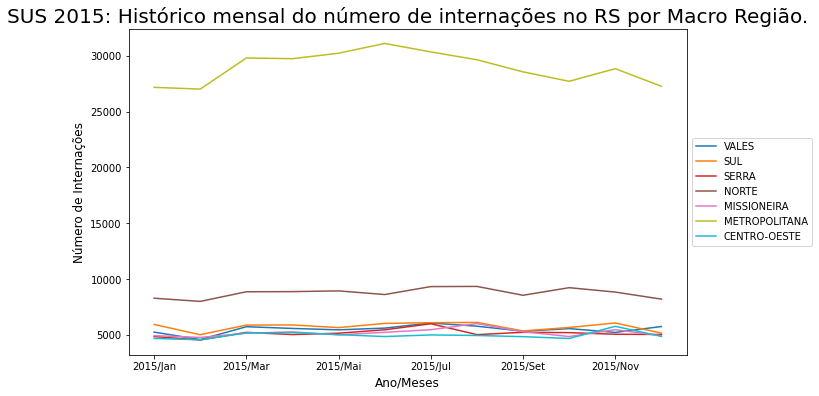

In [ ]:
dados_desafio_sem_total[lista_2015].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2015: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

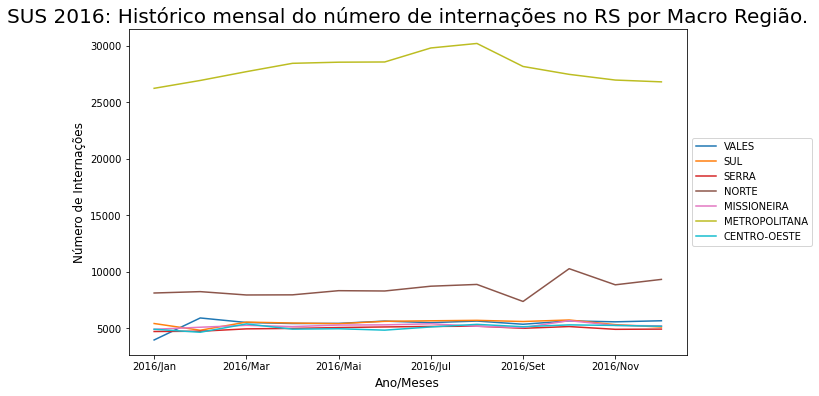

In [ ]:
dados_desafio_sem_total[lista_2016].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2016: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

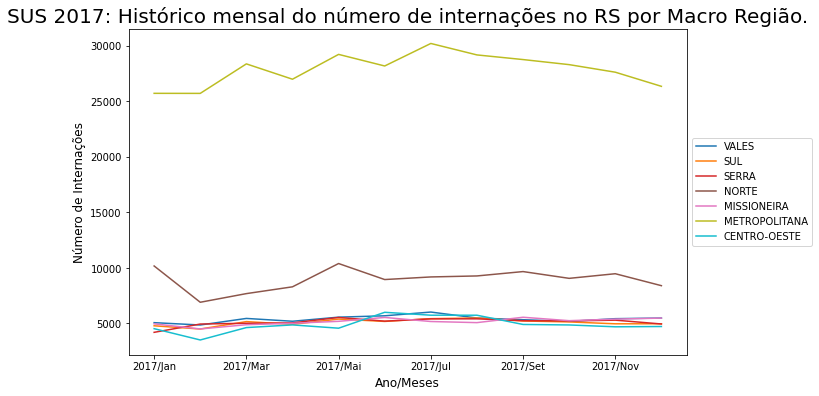

In [ ]:
dados_desafio_sem_total[lista_2017].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2017: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

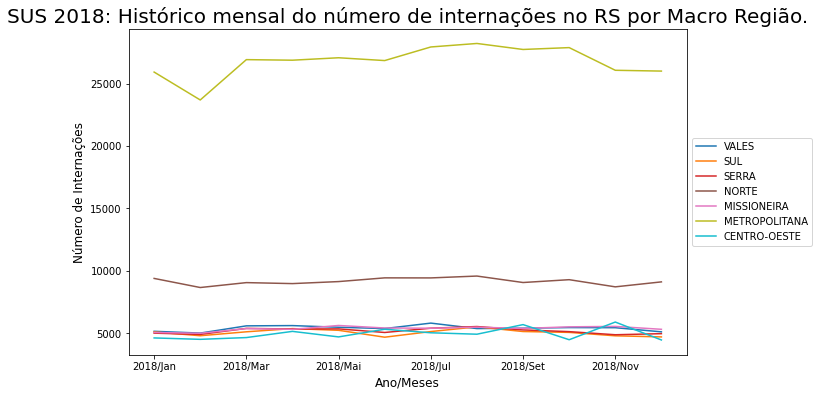

In [ ]:
dados_desafio_sem_total[lista_2018].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2018: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

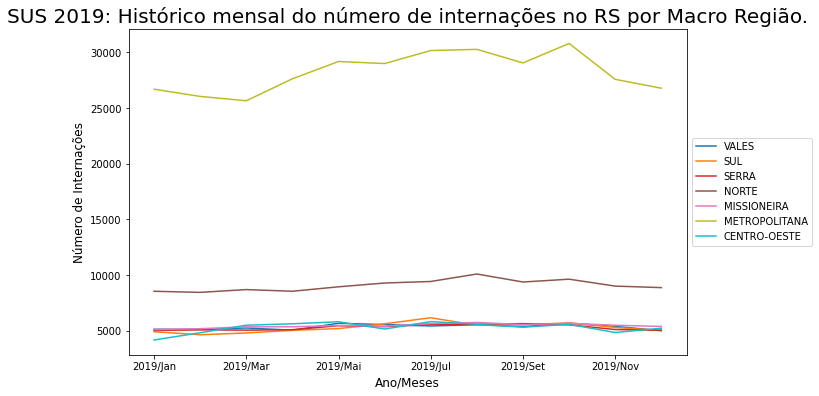

In [ ]:
dados_desafio_sem_total[lista_2019].T.plot(figsize=(10,6), cmap=plt.get_cmap('tab10'))
plt.title('SUS 2019: Histórico mensal do número de internações no RS por Macro Região.', fontsize=20)
plt.ylabel('Número de Internações', fontsize=12)
plt.xlabel('Ano/Meses', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# Lembrando que mesmo que o covid tenha surgido em 2019, foi registrado o primeiro caso no RS apenas em meados de 2020, então ele não irá impactar essa análise.

**Análise Final:** É possível perceber com os gráficos anuais que o número de internações no Rio Grande do Sul é bastante ciclico. O formato de cada gráfico anual é bastante semelhante, além de evidenciar, principalmente, maior número de internações com a chegada do inverno, rigoroso na região.

Fora os padrões identificados, foi possível também perceber alguns outliers, pontos fora do padrão anual e/ou picos nos gráficos. Tais observações foram pontuadas nos gráficos às quais se referem, acrescidas de informações adicionais quando julguei necessário.